In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:

t1 = pd.read_csv('./enrich/m1//Enrichment_GO/_FINAL_GO.csv',sep=',')
t2 = pd.read_csv('./enrich/m2/Enrichment_GO/_FINAL_GO.csv',sep=',')
t3 = pd.read_csv('./enrich/m3/Enrichment_GO/_FINAL_GO.csv',sep=',')
# t1['_LogP_MyList'] = np.absolute( t1['_LogP_MyList'])

# t2 = t2.loc[:,['Description','_LogP_MyList']]
# t2['_LogP_MyList'] = np.absolute( t2['_LogP_MyList'])

# t3 = t3.loc[:,['Description','_LogP_MyList']]
# t3['_LogP_MyList'] = np.absolute(t3['_LogP_MyList'])



In [76]:

t1 = t1.loc[:,['Description','Enrichment','Hits']]
t1['Enrichment'] = np.absolute( t1['Enrichment'])
# t1 = t1.set_index('Description')

t2 = t2.loc[:,['Description','Enrichment','Hits']]
t2['Enrichment'] = np.absolute( t2['Enrichment'])
# t2 = t2.set_index('Description')

t3 = t3.loc[:,['Description','Enrichment','Hits']]
t3['Enrichment'] = np.absolute(t3['Enrichment'])
# t3 = t3.set_index('Description')



In [77]:
t1.columns = ['Description', 'Maro1_s', 'Maro1_Hits']
t2.columns = ['Description', 'Maro2_s', 'Maro2_Hits']
t3.columns = ['Description', 'Maro3_s', 'Maro3_Hits']

In [78]:
df_inter = t1.merge(t2, how='inner',on=['Description']).merge(t3, how='inner', on='Description')
df_inter = df_inter.set_index('Description')
df_inter = df_inter.loc[list(set(df_inter.index)),:]
df_inter = df_inter.drop_duplicates(subset=None, keep=False, inplace=False)

In [79]:
inter = list(df_inter.index)

In [105]:
interest = [
    'humoral immune response',
# 'regulation of complement activation',
'endocytosis',
'positive regulation of cell-cell adhesion',
# 'positive regulation of lymphocyte proliferation',
# 'Focal adhesion',
'Signaling by Interleukins',
# 'regulation of leukocyte proliferation',
'Complement and coagulation cascades',
'regulation of leukocyte activation',
'regulation of secretion by cell',
]

In [106]:
df_inter['des'] = list(df_inter.index)

In [107]:
df_inter = df_inter.drop_duplicates(subset='des')

In [108]:
df_inter.to_csv('./enrich/pathways_inter_maro.csv')
# htmp.to_csv('./enrich/pathways_interest.csv')


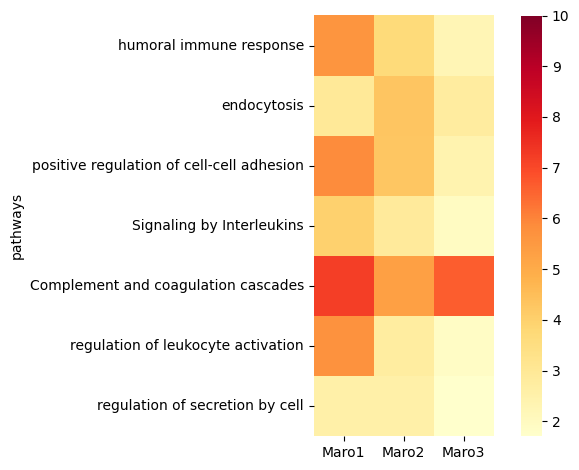

In [109]:
fig = plt.figure()
interst = interest
htmp = pd.DataFrame(columns=['pathways','Maro1', 'Maro2', 'Maro3','Maro1_Hits','Maro2_Hits','Maro3_Hits'])
htmp['pathways'] = interst
# htmp['Fib1'] = list(t1.loc[interst, '_LogP_MyList'])
# htmp['Fib2'] = list(t2.loc[interst, '_LogP_MyList'])
# htmp['Fib3'] = list(t3.loc[interst, '_LogP_MyList'])

htmp['Maro1'] = list(df_inter.loc[interst, 'Maro1_s'])
htmp['Maro2'] = list(df_inter.loc[interst, 'Maro2_s'])
htmp['Maro3'] = list(df_inter.loc[interst, 'Maro3_s'])
htmp['Maro1_Hits'] = list(df_inter.loc[interst,'Maro1_Hits'])
htmp['Maro2_Hits'] = list(df_inter.loc[interst,'Maro2_Hits'])
htmp['Maro_Hits'] = list(df_inter.loc[interst,'Maro3_Hits'])
htmp = htmp.set_index('pathways')
sns.heatmap(htmp.iloc[:,:3],cmap='YlOrRd',square=True,vmax=10,)
plt.tight_layout()
plt.savefig('./figures/pathways_hp_maro.jpg',dpi=400, bbox_inches='tight')

In [110]:
def find_gene(x, gene='NEGR1'):
    x = list(x)
#     print(x[1].split('|'))

    if gene in x[1].split('|'):
        return True
    elif gene in x[3].split('|'):
        return True
    elif gene in x[5].split('|'):
        return True
    else:
        return False

In [111]:
df_inter['NEGR1'] = df_inter.apply(find_gene, axis=1)

In [22]:
df_inter[df_inter['NEGR1']].to_csv('./enrich/NEGR1_pathways.csv')